In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
np.random.seed(2304)

In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
liver = pd.read_csv(r'indian_liver_patient.csv' )
liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [6]:
liver.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

We can ether call the desired coloumn by name or position:

In [7]:
ill_1 = liver.ix[:, ['Dataset']]
ill_2 = liver.ix[:, -1]
print(ill_1.shape)
print(ill_2.shape)

(583, 1)
(583,)


ValueError: 'c' argument has 583 elements, which is not acceptable for use with 'x' with size 579, 'y' with size 579.

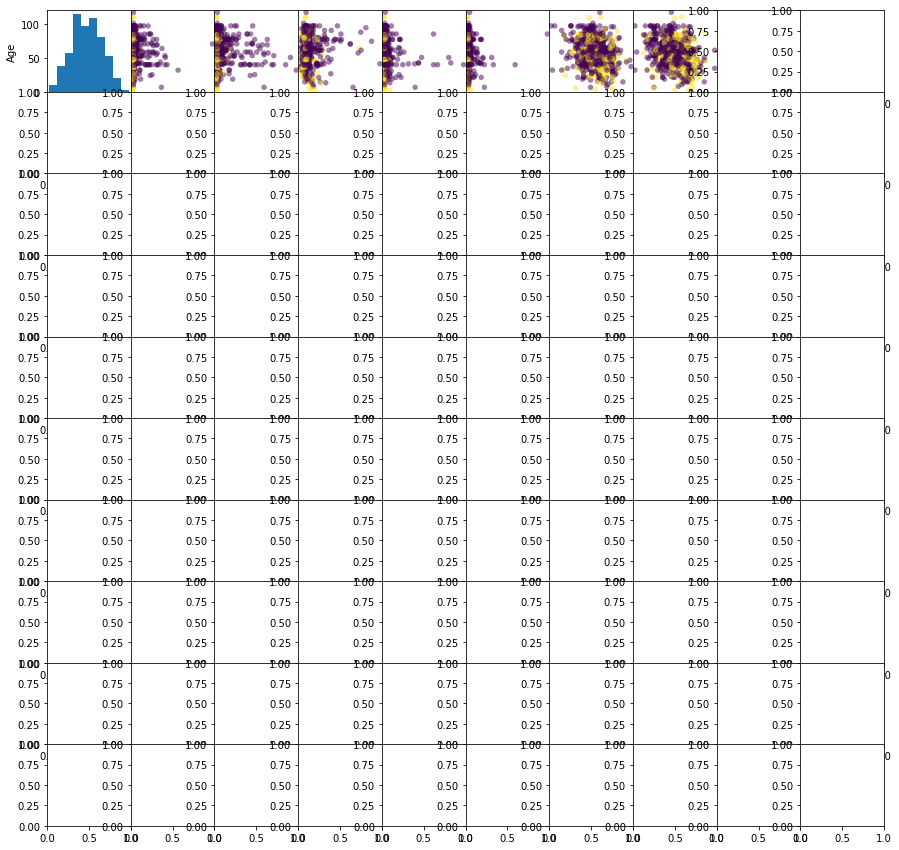

In [8]:
pd.plotting.scatter_matrix(liver, c=ill_2, figsize=(15,15), marker='o', s=30),
plt.show()

In big data sets it can be hard to spot missing values. In this case the scatter matrix results in an error since some values are missing (resulting in different lenghts in the data sets). 

Since it only a few rows have missing values we can choose to simple drop these rows:

In [9]:
liver=liver.dropna()
ill = liver.ix[:, -1]

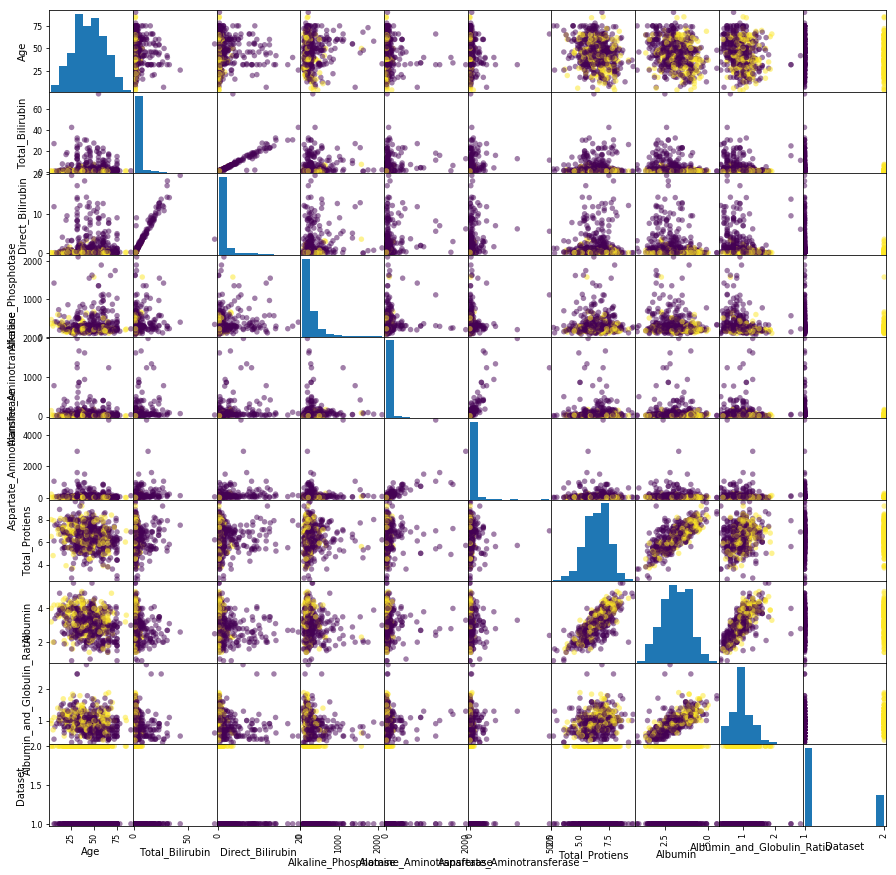

In [10]:
pd.plotting.scatter_matrix(liver, c=ill, figsize=(15,15), marker='o', s=30),
plt.show()

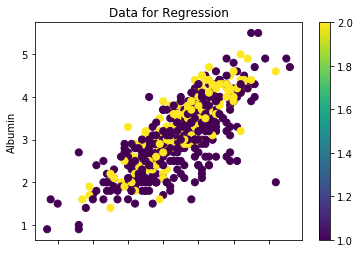

In [11]:
liver.plot.scatter(x='Total_Protiens', y='Albumin', c=ill, colormap='viridis', s=50, title='Data for Regression', );

In [12]:
X = liver.ix[:, 7:8]
y = liver.ix[:, 8:9]

In [13]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_proba = reg.predict(X)

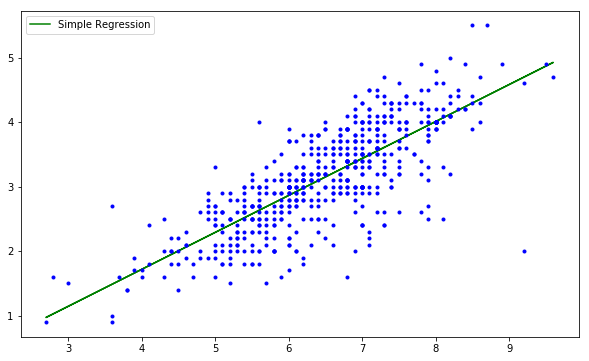

In [15]:
f = plt.figure(figsize=(10, 6))
plt.plot(X, y_proba[:, 0], "g-", label="Simple Regression")
plt.plot(X, y, 'bo', markersize=3)
plt.legend(loc='best');

In [16]:
k = reg.coef_[0]
d = reg.intercept_
print(' y = {0} * x + {1}'.format(k, d))

 y = [0.57358282] * x + [-0.57927284]


In [17]:
sample=reg.predict(5)
sample

array([[2.28864127]])

How good is our regression?

In [18]:
reg.score(X, y) #r^2

0.6132646709931266

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_proba) #mse

0.2436573658501719

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15)

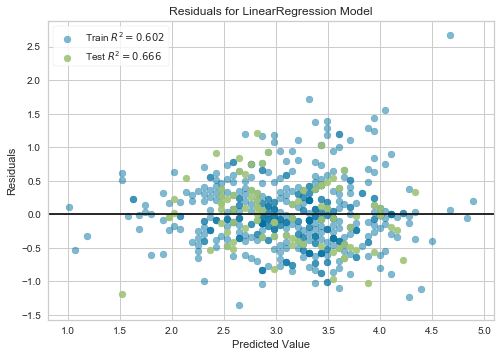

In [21]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(reg, hist=False)

visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof() 

Outliers?


In [22]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100, random_state=2304, contamination=0.02) #How many outlier do we want to detect?
clf.fit(X_train);

In [23]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0]) #correct/all

Accuracy: 0.9885057471264368


In [24]:
X_inlier=X_train[clf.predict(X_train)==1]
y_inlier=y_train[clf.predict(X_train)==1]
X_outlier=X_train[clf.predict(X_train)==-1]
y_outlier=y_train[clf.predict(X_train)==-1]
print(X_inlier.shape)
print(X_outlier.shape)

(482, 1)
(10, 1)


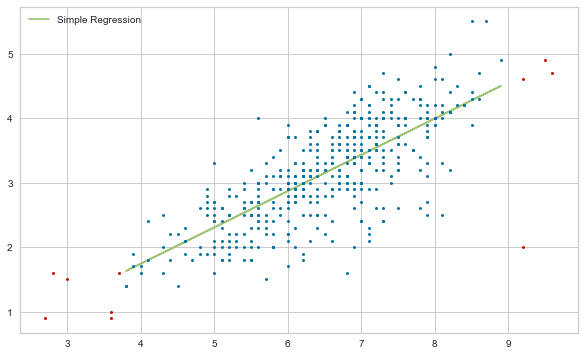

In [25]:
y_proba_inlier = reg.predict(X_inlier)

f = plt.figure(figsize=(10, 6))
plt.plot(X_inlier, y_proba_inlier[:, 0], "g-", label="Simple Regression")
plt.plot(X_inlier, y_inlier, 'bo', markersize=3)
plt.plot(X_outlier, y_outlier, 'ro', markersize=3)
plt.legend(loc='best');

Improvement?

In [26]:
print(reg.score(X_train, y_train))
reg.score(X_inlier, y_inlier) #

0.6023470098113574


0.586983341422799

In [27]:
y_proba_train = reg.predict(X_train)
print(mean_squared_error(y_train, y_proba_train))
mean_squared_error(y_inlier, y_proba_inlier)

0.24752267378835602


0.23559848041502668

We managed to decrease the mse but also decreased the r^2

### two variables

In [28]:
heart = pd.read_csv(r'echocardiogram.csv' )
heart

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.00,0.0,71.000,0.0,0.260,9.000,4.600,14.00,1.000,1.000,name,1,0.0
1,19.00,0.0,72.000,0.0,0.380,6.000,4.100,14.00,1.700,0.588,name,1,0.0
2,16.00,0.0,55.000,0.0,0.260,4.000,3.420,14.00,1.000,1.000,name,1,0.0
3,57.00,0.0,60.000,0.0,0.253,12.062,4.603,16.00,1.450,0.788,name,1,0.0
4,19.00,1.0,57.000,0.0,0.160,22.000,5.750,18.00,2.250,0.571,name,1,0.0
5,26.00,0.0,68.000,0.0,0.260,5.000,4.310,12.00,1.000,0.857,name,1,0.0
6,13.00,0.0,62.000,0.0,0.230,31.000,5.430,22.50,1.875,0.857,name,1,0.0
7,50.00,0.0,60.000,0.0,0.330,8.000,5.250,14.00,1.000,1.000,name,1,0.0
8,19.00,0.0,46.000,0.0,0.340,0.000,5.090,16.00,1.140,1.003,name,1,0.0
9,25.00,0.0,54.000,0.0,0.140,13.000,4.490,15.50,1.190,0.930,name,1,0.0


In [29]:
heart=heart.dropna(subset=heart.columns[0:7], how='any')

In [30]:
heart.shape

(108, 13)

In [31]:
alive = heart.ix[:, 6]
alive.shape

(108,)

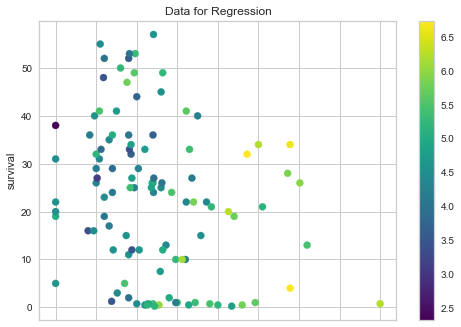

In [32]:
heart.plot.scatter(x='epss', y='survival', c=alive, colormap='viridis', s=50, title='Data for Regression');

In [33]:
X2 = heart.ix[:, ['epss', 'survival']]
y2 = alive

In [34]:
X2 = X2.values

In [35]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42, test_size=0.15)

In [57]:

from matplotlib.colors import ListedColormap

In [80]:
def plot_decision_regions(X, y, classifier):
    """
    Modified from https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch03/ch03.ipynb
    """
    
    f = plt.figure()

    # Find the lower and upper values for the petal length and petal width
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Generate a bunch of measurements in-between the min and max values
    x0, x1 = np.meshgrid(
        np.linspace(x0_min, x0_max, 500).reshape(-1, 1),
        np.linspace(x1_min, x1_max, 200).reshape(-1, 1),
    )
    
    X_new = np.array([x0.ravel(), x1.ravel()]).T
    
    # Predict with the classifier on the new data
    Z = classifier.predict(X_new)
    
    # Reshape and plot as a contour plot:
    Z = Z.reshape(x0.shape)
    plt.contourf(x0, x1, Z, alpha=0.4, cmap=plt.cm.magma)
    
    # Add the training instances to the plot
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[:,0], 
                    y=X[:,1],
                    alpha=0.6, 
                    edgecolor='black',
                    c=y,
                    cmap='magma',
                    marker='x',
                    label=cl)
        
    plt.xlabel("epss")
    plt.ylabel("survival")


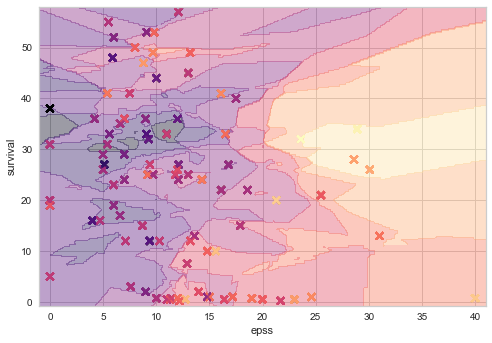

In [81]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X2_train, y2_train)
plot_decision_regions(X2_train, y2_train, knn_reg)

In [79]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X2_train, y2_train)
plot_decision_regions(X2_train, y2_train, log_reg)

ValueError: Unknown label type: 'continuous'

In [ ]:
log_reg.score(X2_test, y2_test)